In [11]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(cowplot)

Warning message:
"pakiet 'cowplot' został zbudowany w wersji R 4.1.3"


In [3]:
analysis <- function(X, Y, display_plot=TRUE){
    spearman <- cor(X, Y, use="pairwise.complete.obs", method="spearman")
    pearson <- cor(X, Y, use="pairwise.complete.obs", method="pearson")
    print(c("Pearson", pearson))
    print(c("Spearman", spearman))
    if (display_plot) {
        ggplot() + geom_point(aes(x=X, y=Y))
    }
}

regression <- function(X, Y, display_plot=TRUE){
    r <- cor(X, Y, use="pairwise.complete.obs")
    Sx <- sd(X)
    Sy <- sd(Y)
    a <- r * Sy / Sx
    b <- mean(Y) - a * mean(X)

    if(display_plot){
        xs <- seq(min(X), max(X), 0.01)
        plt <- ggplot() +
            geom_point(aes(x=X, y=Y), alpha=0.5) +
            geom_line(aes(x = xs, y = a * xs + b), linewidth=1, col="red")
        show(plt)
    }

    return(c(a, b))
}

In [4]:
data <- read.csv("data/data.csv")
data2000 <- data %>% filter(year == 2000)
data2005 <- data %>% filter(year == 2005)
data2010 <- data %>% filter(year == 2010)
data2015 <- data %>% filter(year == 2015)
poland <- data %>% filter(country == "Poland")

[1] "Pearson"           "0.751975462736698"
[1] "Spearman"          "0.813541004769093"


Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."


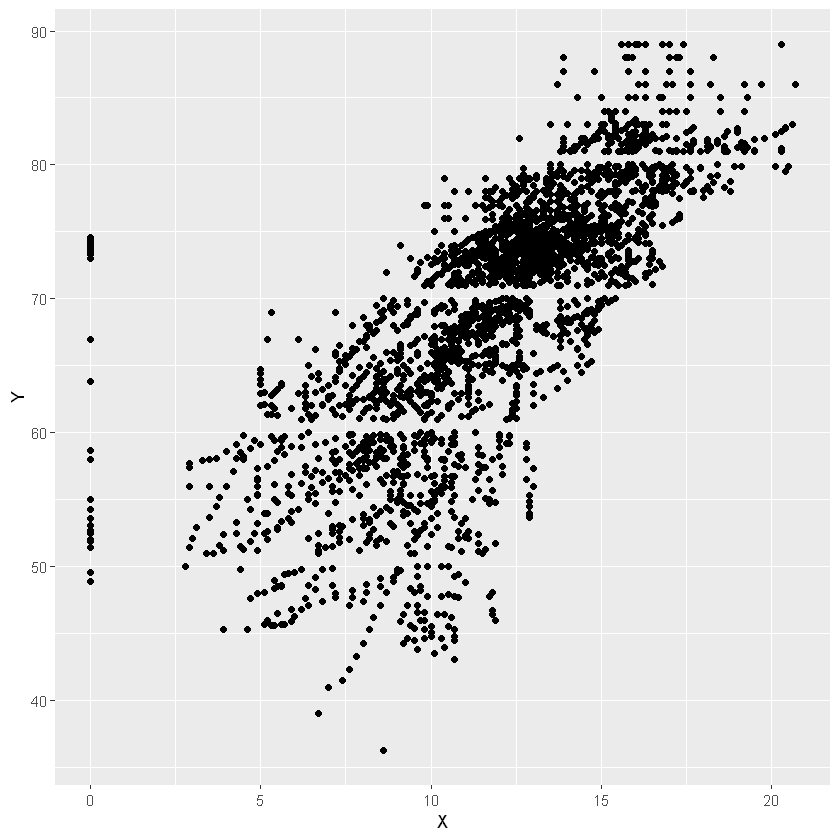

In [5]:
analysis(data$schooling, data$life_expectancy)

In [6]:
df <- data[!is.na(data$schooling) & !is.na(data$life_expectancy),]


In [7]:
length(data$schooling)

[1] 2938

In [8]:
length(data$life_expectancy)

[1] 2938

[1]  2.103453 44.108889

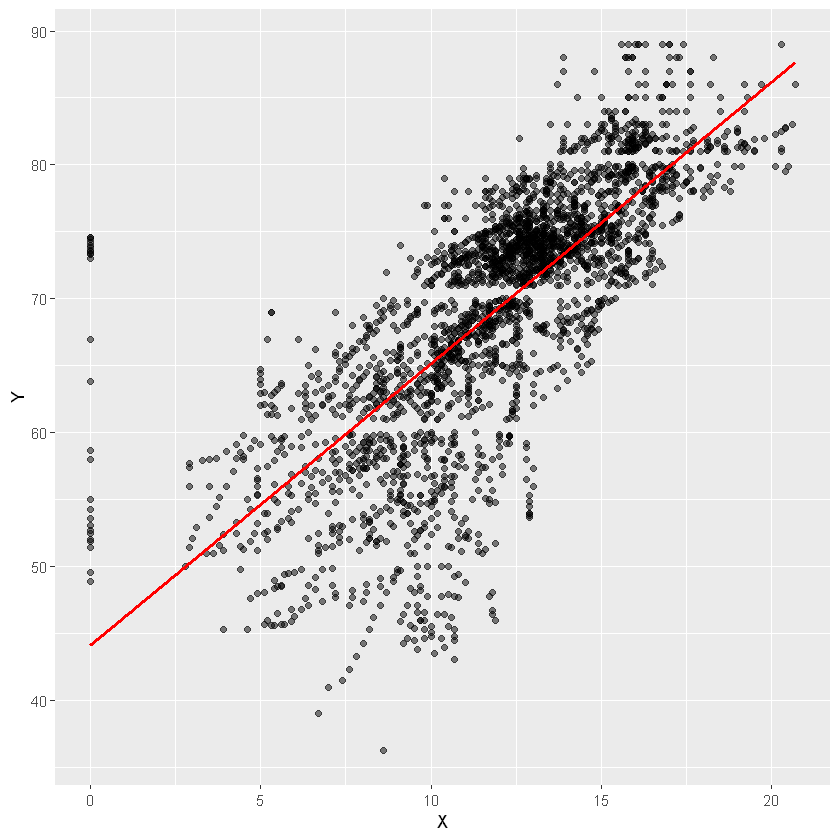

In [9]:
regression(df$schooling, df$life_expectancy)

# Analiza GDP

In [10]:
df2 <- data[(!is.na(data$GDP)) & (!is.na(data$life_expectancy)) & (data$year == 2015),]
scat2 <- ggplot(data = df2, mapping = aes(x = GDP, y = life_expectancy)) + geom_point()

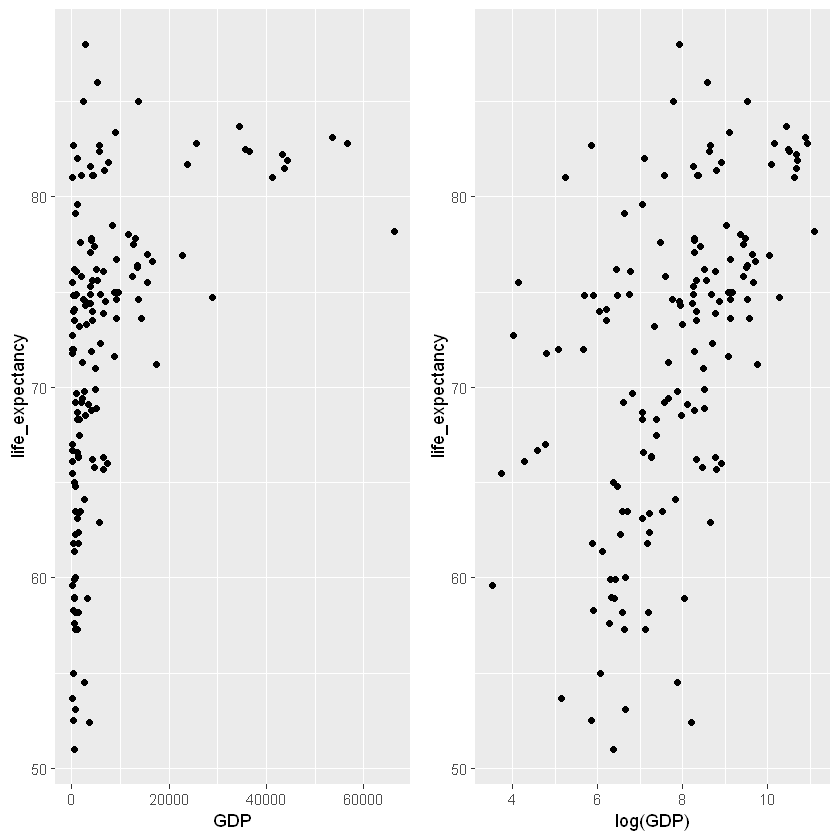

In [12]:
scat2_mod <- ggplot(data = df2, mapping = aes(x = log(GDP), y = life_expectancy)) + geom_point()
plot_grid(scat2, scat2_mod)

In [13]:
c(a1, b1) %<-% regression(log(df2$GDP), df2$life_expectancy, FALSE)
xs1 <- seq(min(log(df2$GDP)), max(log(df2$GDP)), 0.1)
reg2 <- ggplot() + geom_point(aes(log(df2$GDP), df2$life_expectancy), alpha = 0.5) + geom_line(aes(xs1, a1*xs1 + b1), col='red', linewidth=1)

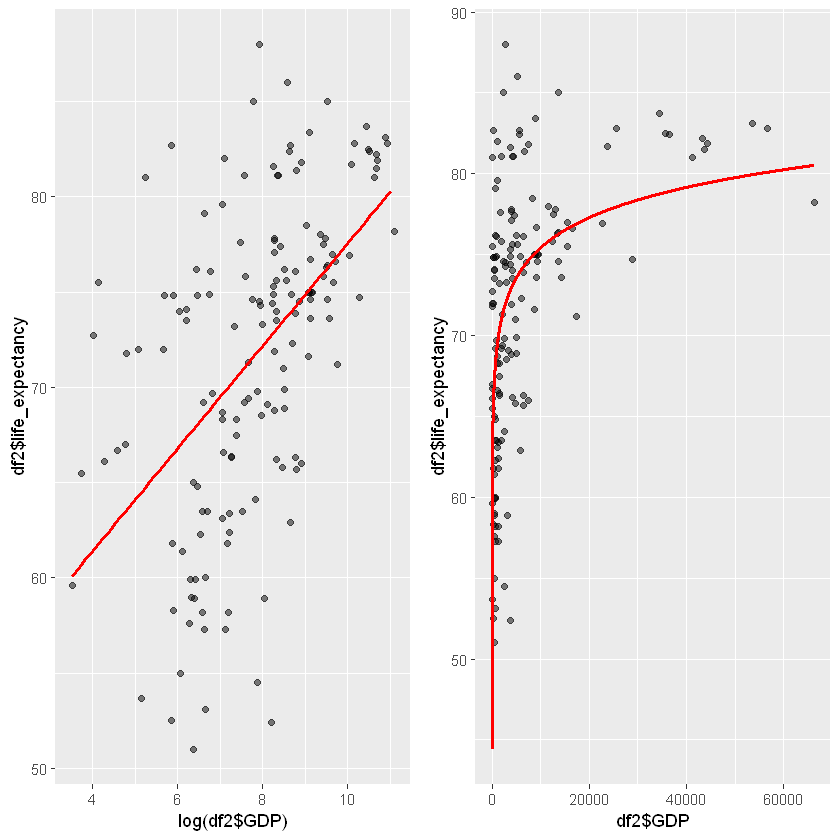

In [14]:
c(a2, b2) %<-% regression(log(df2$GDP), df2$life_expectancy, FALSE)
xs2 <- seq(0.1, max(df2$GDP), 10)
reg2_final <- ggplot() + geom_point(aes(df2$GDP, df2$life_expectancy), alpha = 0.5) + geom_line(aes(xs2, a2*log(xs2) + b2), col='red', linewidth=1)
plot_grid(reg2, reg2_final)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


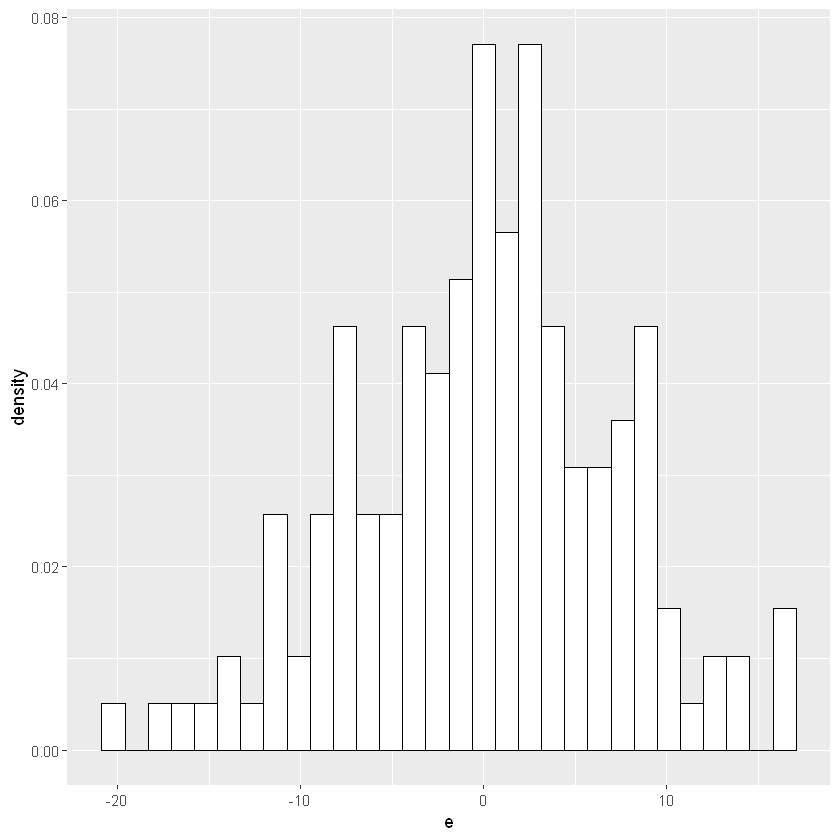

In [15]:
e <- df2$life_expectancy - a2*log(df2$GDP) - b2
hist_e <- ggplot(data.frame(e = e), aes(e)) + geom_histogram(aes(y = after_stat(density)), fill = 'white', color = 'black')
hist_e

In [16]:
mean(e)
sd(e)

[1] 5.282812e-15

[1] 7.069091